<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Multi_Linear_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np


In [ ]:
data = pd.read_csv("/content/ToyotaCorolla.csv", encoding='latin-1')

In [ ]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


#EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
df = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [ ]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


#UNIVARIATE ANALYSIS

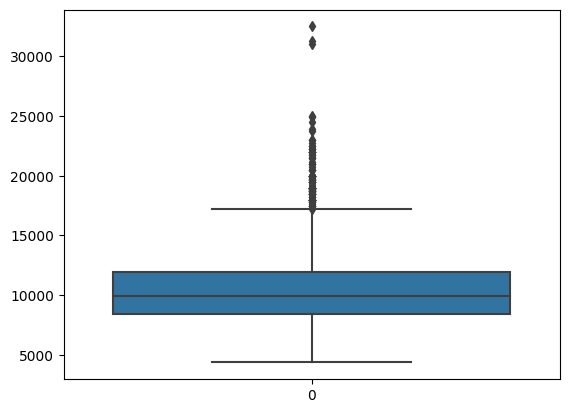

For: Age_08_04


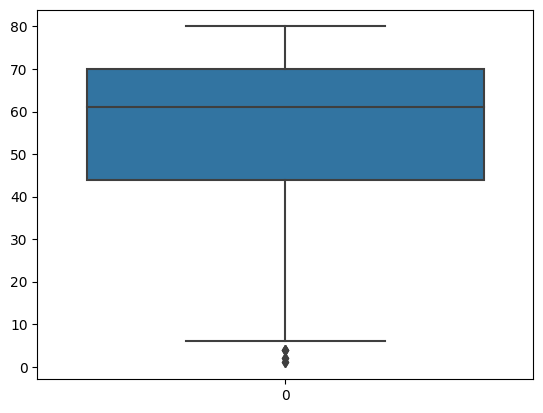

For: KM


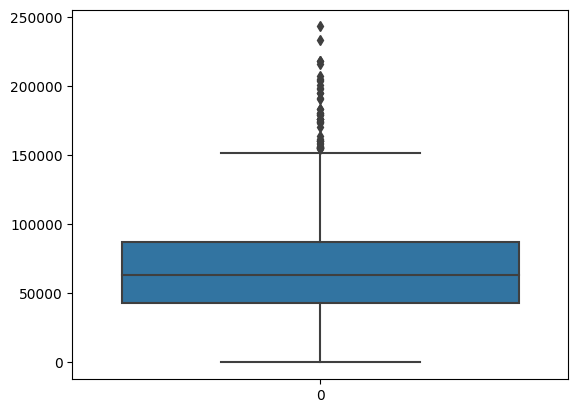

For: HP


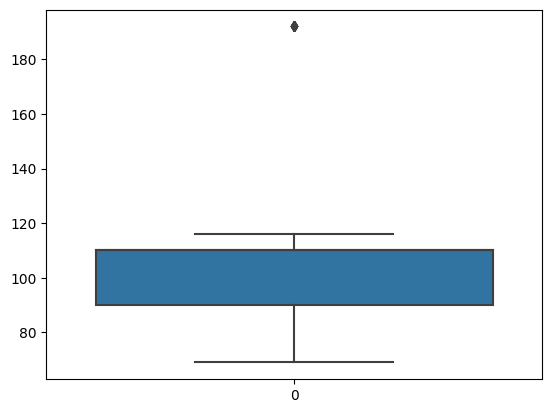

For: cc


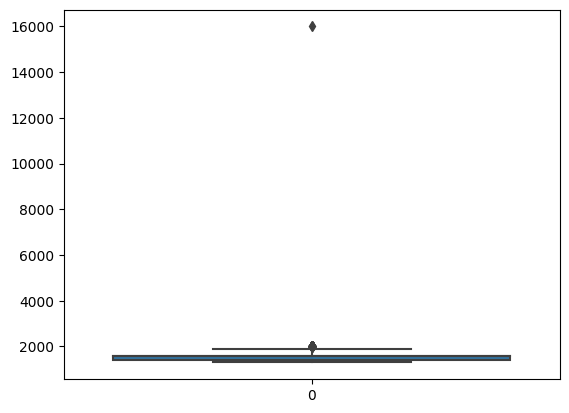

For: Doors


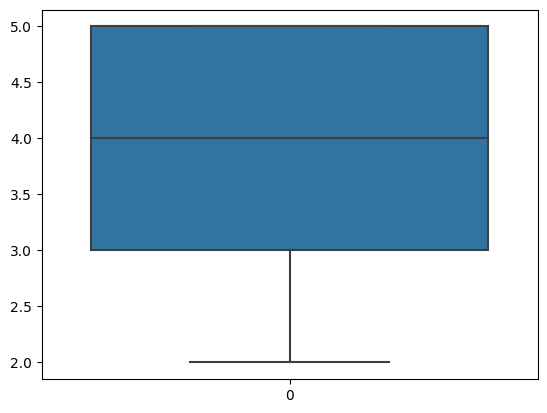

For: Gears


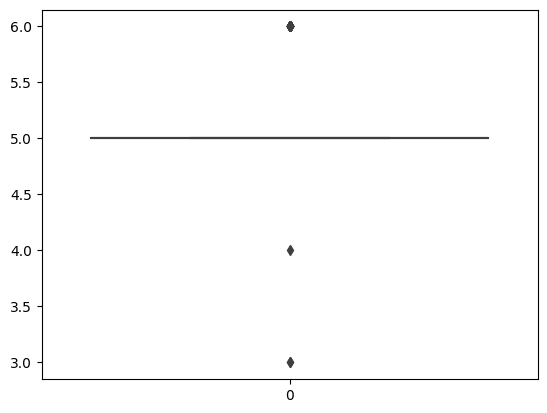

For: Quarterly_Tax


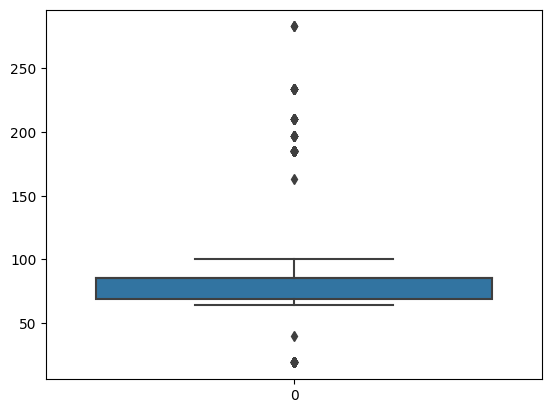

For: Weight


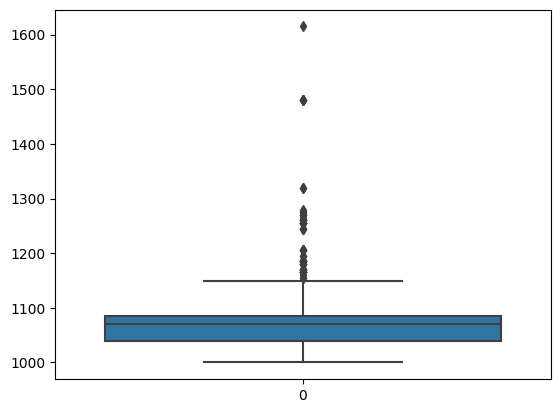

In [ ]:
for i in df.columns:
  print("For:",i)
  sns.boxplot(df[i])
  plt.show()

<Axes: xlabel='Price', ylabel='Age_08_04'>

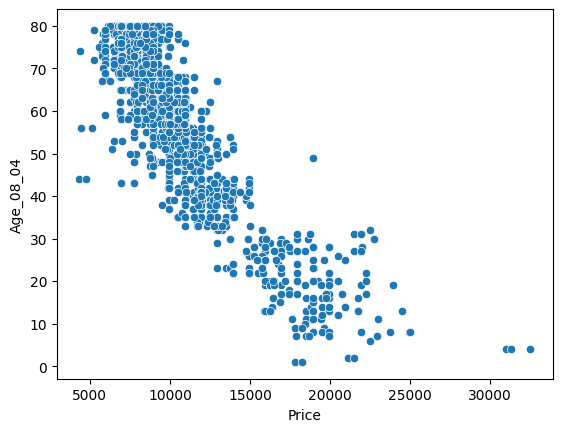

In [ ]:
sns.scatterplot(data=df, x=df['Price'], y=df['Age_08_04'])

In [ ]:
df.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [ ]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


#REMOVING OUTLIERS

In [ ]:
import numpy as np

In [ ]:
Q3 = df['Price'].quantile(q=0.75)
Q1 = df['Price'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

In [ ]:
def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['Price'], down, up)
print(a)

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1435, dtype: int64


In [ ]:
df['Price'] = a

{'whiskers': [<matplotlib.lines.Line2D at 0x7b88af492ce0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b88af493220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b88af492a40>],
 'medians': [<matplotlib.lines.Line2D at 0x7b88af493760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b88af493a00>],
 'means': []}

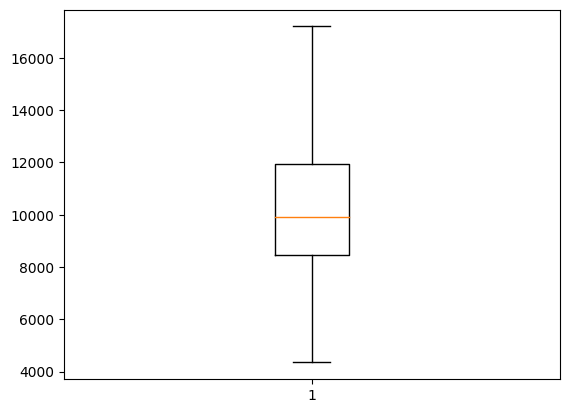

In [ ]:
plt.boxplot(df['Price'])

In [ ]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
Q3 = df['Age_08_04'].quantile(q=0.75)
Q1 = df['Age_08_04'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df['Age_08_04'], down, up)
print(b)

0       23
1       23
2       24
3       26
4       30
        ..
1431    69
1432    72
1433    71
1434    70
1435    76
Name: Age_08_04, Length: 1435, dtype: int64


In [ ]:
df['Age_08_04'] = b

In [ ]:
Q3 = df['KM'].quantile(q=0.75)
Q1 = df['KM'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df['KM'], down, up)
print(c)
df['KM'] = c

0       46986.0
1       72937.0
2       41711.0
3       48000.0
4       38500.0
         ...   
1431    20544.0
1432    19000.0
1433    17016.0
1434    16916.0
1435        1.0
Name: KM, Length: 1435, dtype: float64


In [ ]:
Q3 = df['HP'].quantile(q=0.75)
Q1 = df['HP'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df['HP'], down, up)
print(c)
df['HP'] = c

0       46986.0
1       72937.0
2       41711.0
3       48000.0
4       38500.0
         ...   
1431    20544.0
1432    19000.0
1433    17016.0
1434    16916.0
1435        1.0
Name: KM, Length: 1435, dtype: float64


In [ ]:
Q3 = df['cc'].quantile(q=0.75)
Q1 = df['cc'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df['cc'], down, up)
print(d)
df['cc'] = d

0       1900
1       1900
2       1900
3       1900
4       1900
        ... 
1431    1300
1432    1300
1433    1300
1434    1300
1435    1600
Name: cc, Length: 1435, dtype: int64


In [ ]:
Q3 = df['Gears'].quantile(q=0.75)
Q1 = df['Gears'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

f = cap_extreme_values(df['Gears'], down, up)
print(f)
df['Gears'] = f

0       5
1       5
2       5
3       5
4       5
       ..
1431    5
1432    5
1433    5
1434    5
1435    5
Name: Gears, Length: 1435, dtype: int64


In [ ]:
Q3 = df['Quarterly_Tax'].quantile(q=0.75)
Q1 = df['Quarterly_Tax'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

g = cap_extreme_values(df['Quarterly_Tax'], down, up)
print(g)
df['Quarterly_Tax'] = g

0       109
1       109
2       109
3       109
4       109
       ... 
1431     69
1432     69
1433     69
1434     69
1435     45
Name: Quarterly_Tax, Length: 1435, dtype: int64


In [ ]:
Q3 = df['Weight'].quantile(q=0.75)
Q1 = df['Weight'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR


def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

h = cap_extreme_values(df['Weight'], down, up)
print(h)
df['Weight'] = h

0       1152.5
1       1152.5
2       1152.5
3       1152.5
4       1152.5
         ...  
1431    1025.0
1432    1015.0
1433    1015.0
1434    1015.0
1435    1114.0
Name: Weight, Length: 1435, dtype: float64


For: Price


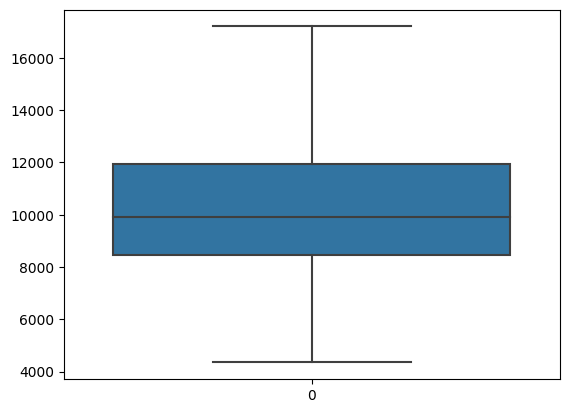

For: Age_08_04


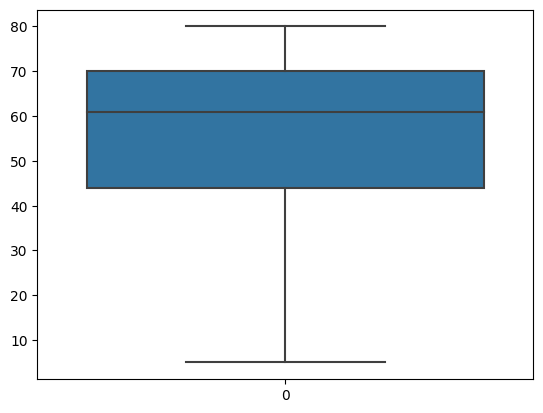

For: KM


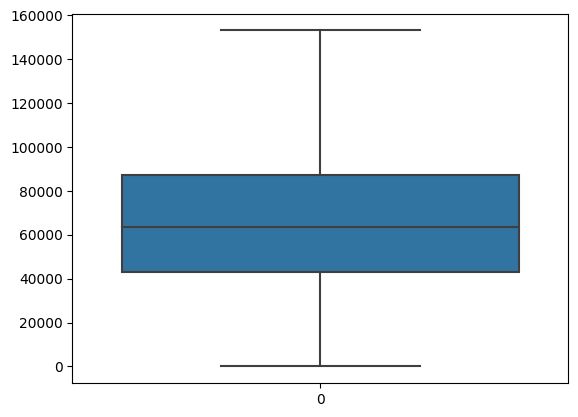

For: HP


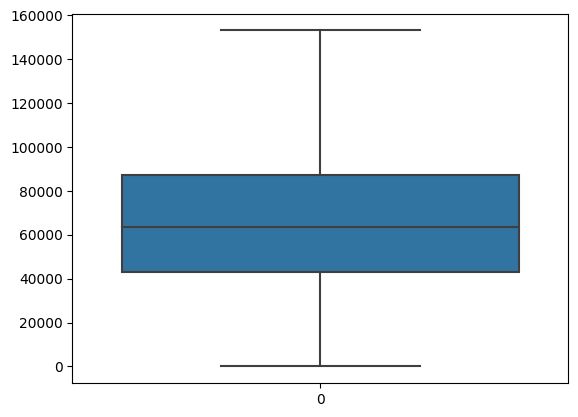

For: cc


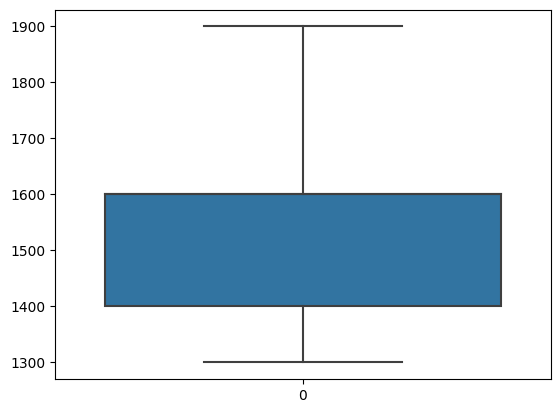

For: Doors


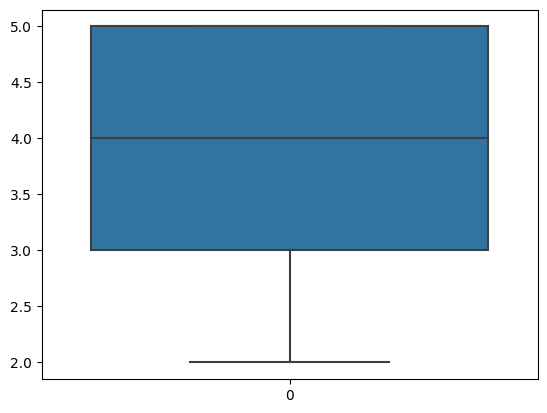

For: Gears


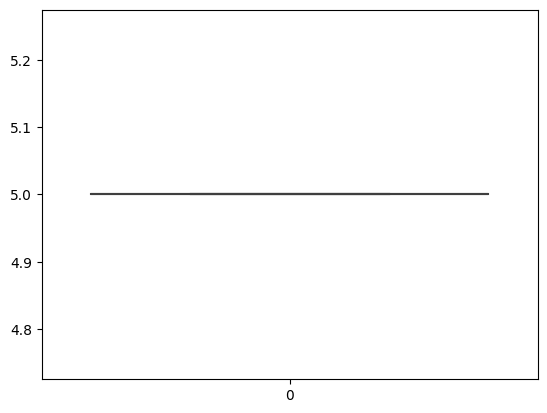

For: Quarterly_Tax


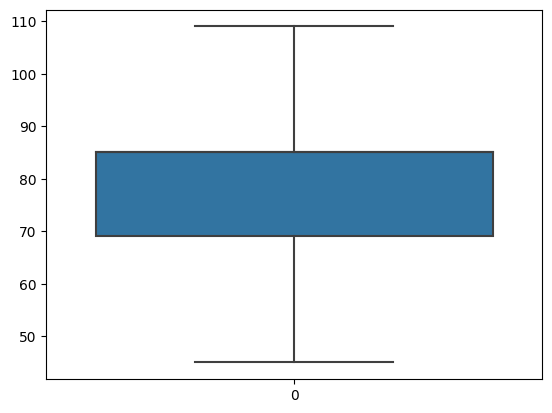

For: Weight


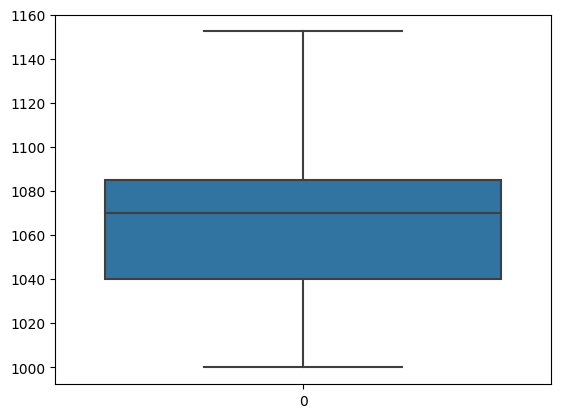

In [ ]:
for i in df.columns:
  print("For:",i)
  sns.boxplot(df[i])
  plt.show()

#BIVARIATE ANALYSIS

In [ ]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.895340,-0.607949,-0.607949,0.129352,0.183010,NaN,0.253012,0.507823
Age_08_04,-0.895340,1.000000,0.530670,0.530670,-0.136644,-0.146704,NaN,-0.237889,-0.476150
KM,-0.607949,0.530670,1.000000,1.000000,0.258680,-0.036618,NaN,0.159038,0.000977
HP,-0.607949,0.530670,1.000000,1.000000,0.258680,-0.036618,NaN,0.159038,0.000977
cc,0.129352,-0.136644,0.258680,0.258680,1.000000,0.138433,NaN,0.581407,0.717782
Doors,0.183010,-0.146704,-0.036618,-0.036618,0.138433,1.000000,NaN,0.251109,0.381177
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarterly_Tax,0.253012,-0.237889,0.159038,0.159038,0.581407,0.251109,NaN,1.000000,0.648266
Weight,0.507823,-0.476150,0.000977,0.000977,0.717782,0.381177,NaN,0.648266,1.000000


<Axes: >

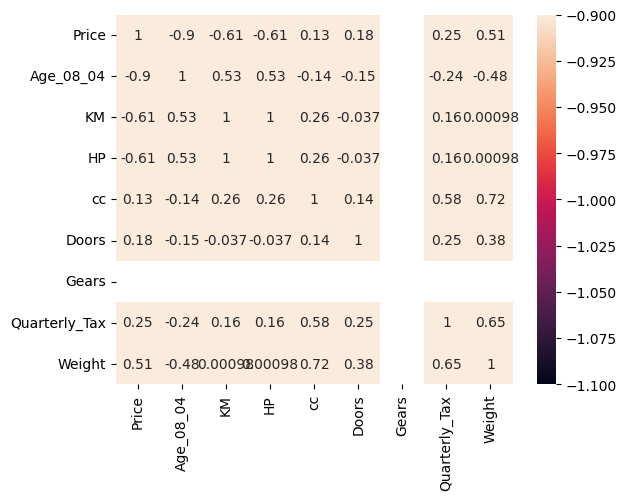

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=-1, annot=True)

#MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#We are removing the 'Gears' columns while model building because it is not effecting the accuracies anyways.
X = df.drop(['Price','Gears'],axis=1)
Y = df['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.852467565681162

In [ ]:
model.score(X_test, Y_test)

0.8546664695403476

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1435 non-null   int64  
 1   Age_08_04      1435 non-null   int64  
 2   KM             1435 non-null   float64
 3   HP             1435 non-null   float64
 4   cc             1435 non-null   int64  
 5   Doors          1435 non-null   int64  
 6   Gears          1435 non-null   int64  
 7   Quarterly_Tax  1435 non-null   int64  
 8   Weight         1435 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 144.4 KB


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
data = df[['Age_08_04' , 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax', 'Weight']]

In [ ]:
gone = pd.DataFrame()
gone['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
gone['Columns'] = data.columns

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
gone

,VIF,Columns
0,14.781080,Age_08_04
1,inf,KM
2,inf,HP
3,179.280677,cc
4,21.633733,Doors
5,51.197886,Quarterly_Tax
6,196.839285,Weight


In [ ]:
X = df.drop(['Price','Gears','KM','HP'], axis=1)
Y = df['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.8233025834502331

In [ ]:
model.score(X_test, Y_test)

0.8093835593137393

In [ ]:
X = df.drop(['Price','Gears','Weight'], axis=1)
Y = df['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.8368849125360305

In [ ]:
model.score(X_test, Y_test)

0.8417337340737463

In [ ]:
X = df.drop(['Price','Gears','Doors'], axis=1)
Y = df['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.8523577988643449

In [ ]:
model.score(X_test, Y_test)

0.8546325320319819

In [ ]:
X = df.drop(['Price','Gears','Quarterly_Tax'], axis=1)
Y = df['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.8521552848136001

In [ ]:
X = df.drop(['Price','Gears','KM'], axis=1)
Y = df['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.852467565681162

In [ ]:
model.score(X_test, Y_test)

0.8546664695403474

In [ ]:
X = df.drop(['Price','Gears','HP'], axis=1)
Y = df['Price']

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y_train,y_pred_train))
print(r2_score(Y_test, y_pred_test))

0.852467565681162
0.8546664695403474


In [ ]:
#For Adjusted r-square for training data
ss_total = (( Y_train- Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_train)
n_vars = len(X_train.columns)

adjusted_r_squared_train = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_train)

#For Adjusted r-square for test data
ss_total = (( Y_test- Y_test.mean())**2).sum()
ss_reg = ((y_pred_test - Y_test.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_test)
n_vars = len(X_test.columns)

adjusted_r_squared_test = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_test)

0.851579707500704
0.7955497038812095


In [ ]:
#Okay, after mismatching with all the combinations, we found that both HP and KM are showing very strong multicollinearity. Moreover, removing both of them at the same time is decreasing the accuracy of the model. This suggests that we should remove either of them. Here, we are removing the 'HP' feature.
#'Gears' feature is anyways not affecting the accuracy of the model.

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)


Lasso(alpha=0.01)

In [ ]:
lasso_pred_train = lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test)

In [ ]:
print(r2_score(Y_train,lasso_pred_train))
print(r2_score(Y_test,lasso_pred_test))

0.8524675656646827
0.8546664844676822


In [ ]:
#For Adjusted r-square for training data
ss_total = (( Y_train- Y_train.mean())**2).sum()
ss_reg = ((lasso_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_train)
n_vars = len(X_train.columns)

adjusted_r_squared_lassotrain = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_lassotrain)

#For Adjusted r-square for test data
ss_total = (( Y_test- Y_test.mean())**2).sum()
ss_reg = ((lasso_pred_test - Y_test.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_test)
n_vars = len(X_test.columns)

adjusted_r_squared_lassotest = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_lassotest)

0.8515793166746675
0.7955487966271766


In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_pred_train = ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test)

In [ ]:
print(r2_score(Y_train,ridge_pred_train))
print(r2_score(Y_test,ridge_pred_test))

0.852467565679091
0.8546664837424025


In [ ]:
#For Adjusted r-square for training data
ss_total = (( Y_train- Y_train.mean())**2).sum()
ss_reg = ((ridge_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_train)
n_vars = len(X_train.columns)

adjusted_r_squared_ridgetrain = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_ridgetrain)

#For Adjusted r-square for test data
ss_total = (( Y_test- Y_test.mean())**2).sum()
ss_reg = ((ridge_pred_test - Y_test.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_test)
n_vars = len(X_test.columns)

adjusted_r_squared_ridgetest = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_lassotest)

0.8515794050870804
0.7955487966271766


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(criterion='squared_error', min_samples_split=7,min_samples_leaf=1 ,min_impurity_decrease=0.001)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, min_samples_split=7)

In [ ]:
tree.score(X_train, Y_train)

0.9690062755348492

In [ ]:
tree.score(X_test, Y_test)

0.8487742606937579

In [ ]:
tree_pred_train = tree.predict(X_train)
tree_pred_test = tree.predict(X_test)

In [ ]:
#For Adjusted r-square for training data
ss_total = (( Y_train- Y_train.mean())**2).sum()
ss_reg = ((tree_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_train)
n_vars = len(X_train.columns)

adjusted_r_squared_treetrain = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_treetrain)

#For Adjusted r-square for test data
ss_total = (( Y_test- Y_test.mean())**2).sum()
ss_reg = ((tree_pred_test - Y_test.mean())**2).sum()
r_squared = ss_reg / ss_total

n_obs = len(X_test)
n_vars = len(X_test.columns)

adjusted_r_squared_treetest = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)
print(adjusted_r_squared_treetest)

0.9688197536223206
0.9273189783384389


In [ ]:
results = pd.DataFrame(dtype='int', columns=[['R_squared_train_Accuracy', 'R_sqaured_test_Accuracy']], index=['LinearRegression', 'Lasso', 'Ridge', 'DecisionTree'])


In [ ]:
results

,R_squared_train_Accuracy,R_sqaured_test_Accuracy
LinearRegression,NaN,NaN
Lasso,NaN,NaN
Ridge,NaN,NaN
DecisionTree,NaN,NaN


In [ ]:
results['R_squared_train_Accuracy'] = ['0.851579707500704','0.8515793166746675','0.8515794050870804','0.9688197536223206']
results['R_sqaured_test_Accuracy'] = ['0.7955497038812095','0.7955487966271766','0.7955487966271766','0.9273189783384389']

In [ ]:
results

,R_squared_train_Accuracy,R_sqaured_test_Accuracy
LinearRegression,0.851579707500704,0.7955497038812095
Lasso,0.8515793166746675,0.7955487966271766
Ridge,0.8515794050870804,0.7955487966271766
DecisionTree,0.9688197536223206,0.9273189783384389


#Hence, we find that Decision Tree Regressor is giving us better results than Linear Regression, Lasso and Ridge.